# ***                     💳 🕵🏻‍♂️Credit Card Fraud Detection 💳🕵🏻‍♂️***

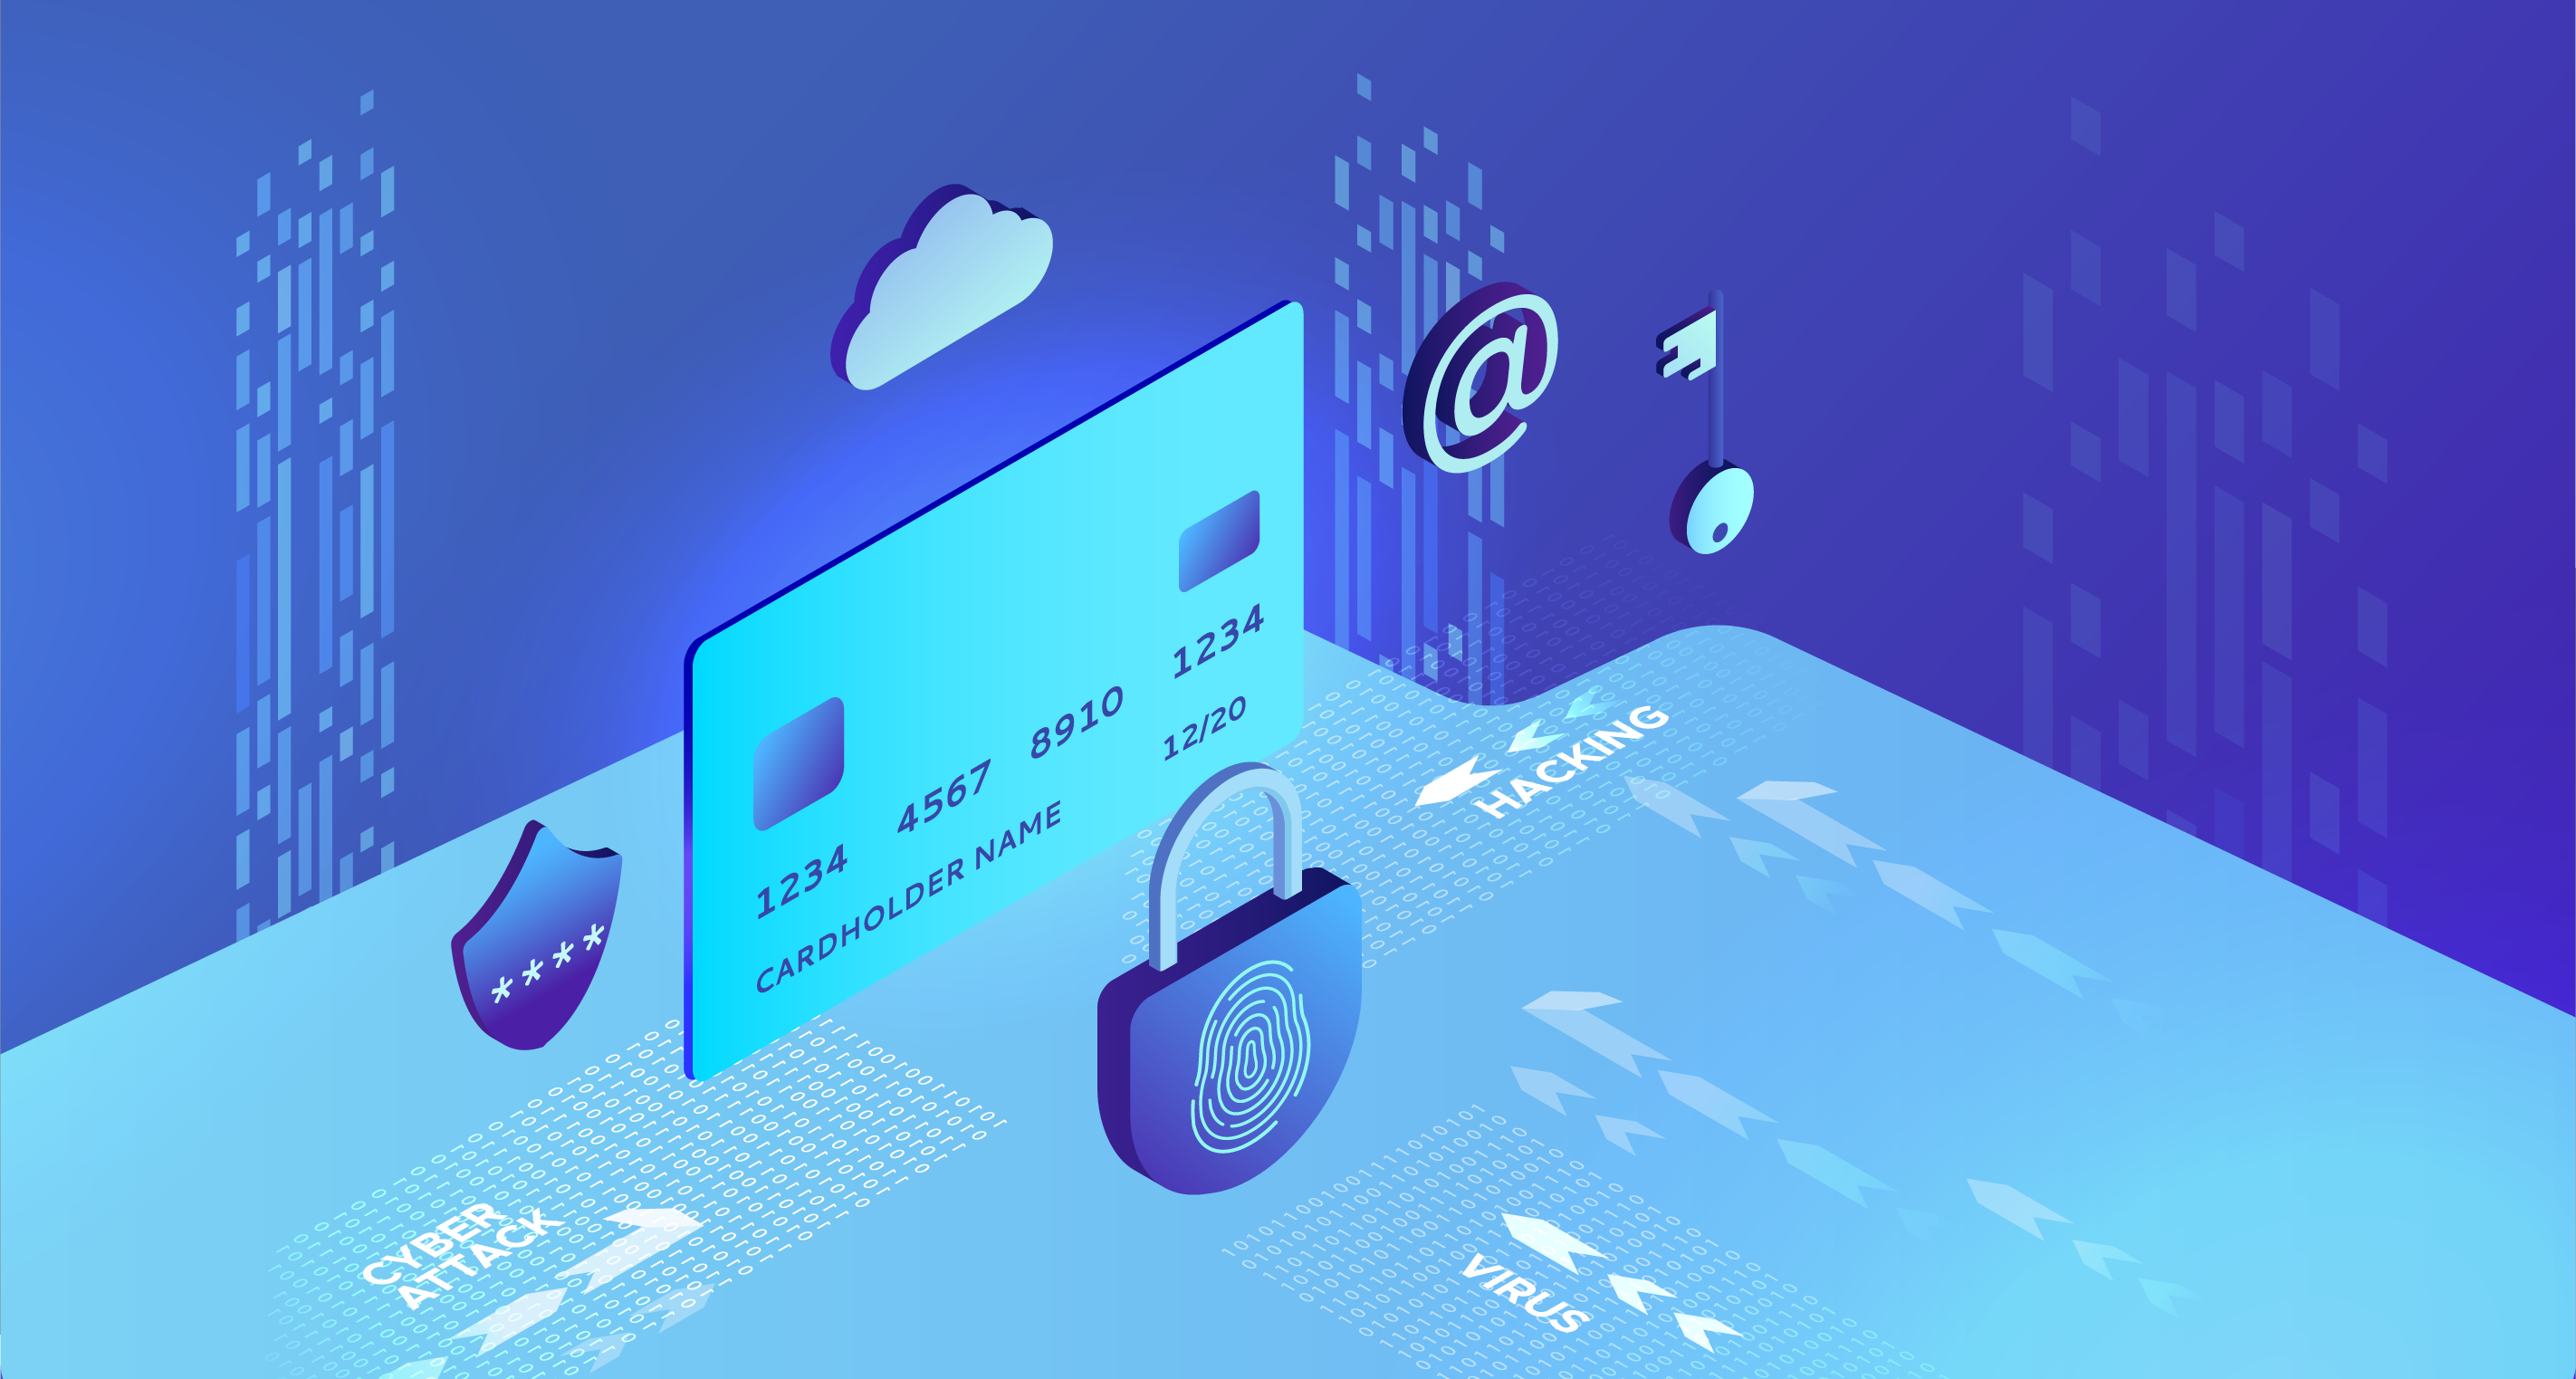

# **📚Importing Libraries📚**


In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio

from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve


import warnings
warnings.filterwarnings('ignore')

In [35]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras import regularizers
from scipy.stats import ks_2samp

# **⏳ Loading the dataset ⏳**

In [36]:
credit_card = pd.read_csv('/content/creditcard.csv')

In [37]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# **🧹 Data Cleaning 🧹**

In [39]:
                        # Checking null values

credit_card.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [40]:
          # Dropping the duplicated values
credit_card = credit_card.drop_duplicates()

# **🧩 Feature Engineering 🧩**

In [41]:
credit_card['Hour'] = credit_card['Time'].apply(lambda x : np.ceil(float(x)/3600) % 24)

# **📊 Exploratory Data Analysis 📊**

In [42]:
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667,14.124909
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796,6.229348
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000,10.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000,15.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000,19.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000,23.000000


In [43]:
fig = px.pie(credit_card, names='Class', title='Distribution of Class Column', color_discrete_sequence=['#4A1A22', '#78545A'], hole=0.4)
fig.update_layout(showlegend=True, legend=dict(title='Class', itemsizing='constant'), plot_bgcolor='white' )
fig.show()

In [44]:
average_time_per_class = credit_card.groupby('Class')['Time'].mean().reset_index()
fig = px.bar(average_time_per_class, x='Class', y='Time', text = 'Time', title='Average Time for Each Fraudulent and Non Fraudulent Class')

fig.update_layout(xaxis_title='Class', yaxis_title='Average Time', plot_bgcolor='white' )
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside', marker_color=['#4A1A22', '#78545A'])
fig.update_xaxes(tickvals=[0, 1], ticktext=['0', '1'])
fig.show()

In [45]:
average_amount_per_class = credit_card.groupby('Class')['Amount'].median().reset_index()
fig = px.bar(average_amount_per_class, x='Class', y='Amount', text = 'Amount', title='Average Amount for Each Fraudulent and Non Fraudulent Class', color_discrete_sequence=['#4A1A22', '#78545A'])
fig.update_layout(xaxis_title='Class', yaxis_title='Average Amount', plot_bgcolor='white')
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside', marker_color=['#4A1A22', '#78545A'])
fig.update_xaxes(tickvals=[0, 1], ticktext=['0', '1'])
fig.show()

In [46]:
hourly_transaction_counts = credit_card.groupby(['Hour', 'Class']).size().unstack()
hourly_transaction = pd.DataFrame(hourly_transaction_counts)
hourly_transaction.head(24)

Class,0,1
Hour,,
0.0,10868,17
1.0,7639,6
2.0,4200,10
3.0,3258,48
4.0,3471,17
5.0,2180,23
6.0,2977,11
7.0,4074,9
8.0,7209,23


In [47]:
fig = px.bar(hourly_transaction, x = hourly_transaction.index, y = hourly_transaction.columns, barmode='group', color_discrete_sequence=['#4A1A22', '#78545A'])
fig.update_layout(title_text="Number of transactions with respect to hour of the day", xaxis_title="Hour", yaxis_title="Count of Transactions", plot_bgcolor = 'white')
fig.show()

In [48]:
class_0_df = hourly_transaction[0].reset_index()
fig_class_0 = px.bar(class_0_df, x='Hour', y=0, title="Distribution of non fraud transactions in each hour", labels={'0': 'Count of Transactions'}, color_discrete_sequence = ['#4A1A22'])
fig_class_0.update_layout(plot_bgcolor='white')
fig_class_0.show()

In [49]:
class_1_df = hourly_transaction[1].reset_index()
fig_class_1 = px.bar(class_1_df, x='Hour', y=1, title="Distribution of fraud transactions in each hour", labels={'1': 'Count of Transactions'}, color_discrete_sequence=['#78545A'])
fig_class_1.update_layout(plot_bgcolor='white')
fig_class_1.show()

In [50]:
average_amount_per_hour = credit_card.groupby('Hour')['Amount'].median().reset_index()
fig = px.line(average_amount_per_hour, x='Hour', y='Amount', title='Average Amount of Transactions for Each Hour', labels={'Hour': 'Hour of the Day', 'Amount': 'Average Transaction Amount'}, line_shape='spline', color_discrete_sequence = ['#4A1A22'])
fig.update_layout(plot_bgcolor='white')
fig.show()

In [51]:
average_amount_per_hour_class = credit_card.groupby(['Hour', 'Class'])['Amount'].median().reset_index()
fig = px.line(average_amount_per_hour_class, x='Hour', y='Amount', color='Class', title='Average transaction amount for non fraud and fraud events in each hour', labels={'Hour': 'Hour of the Day', 'Amount': 'Average Transaction Amount', 'Class': 'Class'}, line_shape='spline', color_discrete_sequence=['#4A1A22', '#B9A6A9'])
fig.update_layout(plot_bgcolor='white')
fig.show()

# **📊 Insights:**


*   The dataset is highly imbalanced as the class for non fraud transactions constitutes 99.8% of the data
*   It can be clearly seen that the average time for fraudulent transactions is less than fraudulent ones.
*   Following this, average transaction amount is also less in fraudulent transactions compared to non fraudulent ones.
*   The least number of transactions done are between 1am to 8am
*   The highets number of non fraud transactions are done around 10pm
*   The highest number of fraud transactions are done at 3am and 12pm
*   Irrespective of fraud and non fraud class, the minimum average transaction amount is 11.88K, around 6am to 7am. However, the highest average transaction amount is 33 around 11am
*   In case of fraudulent transactions, it can be clearly seen that the highest average amount transaction is done around 1am with a value of 230. Furthermore, the average transaction amount fluctuates a lot in different hours of the day
*   In case of non fraud transactions, the average transaction amount doesn't seems to have any noticeable flucations during the whole day.








# **⚙️ Data Preprocessing ⚙️**

# **1. Feature Scaling ¶**

In [52]:
sc = StandardScaler()
credit_card['std_Amount'] = sc.fit_transform(credit_card['Amount'].values.reshape (-1,1))

         #removing Amount
credit_card = credit_card.drop(columns = ["Amount", "Time"], axis=1)

# **2. Class Imbalance  ¶**

In [53]:
credit_card.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [54]:
undersample = RandomUnderSampler(sampling_strategy=0.5)

In [55]:
     # Keeping the predictor and target variable

X = credit_card.drop('Class', axis = 1)
y = credit_card['Class']

In [56]:
X_under, Y_under = undersample.fit_resample(X, y)

# **3. Splitting into training and testing   ¶**

In [57]:
# Splitting the dataset into training and testing parts

X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under, test_size = 0.3, random_state = 2)

# **🎯 Model Building 🎯**

# **1. Baseline Model Building  ¶**

In [58]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
lg_pred = lg.predict(X_test)

# **2. Other Models Buidling  ¶**

In [59]:
svc = SVC(kernel = 'linear',C = 0.1)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

# **⚡ Model Evaluation ⚡**

# **1. Baseline Model Evaluation   ¶**

Mean Cross-Validation Score: 0.97
The ROC AUC Score is: 0.94 



The classification report of Logistic Regressor is below :  


               precision    recall  f1-score   support

           0       0.95      0.98      0.96       280
           1       0.96      0.89      0.93       146

    accuracy                           0.95       426
   macro avg       0.95      0.94      0.94       426
weighted avg       0.95      0.95      0.95       426
 



The confusion matrix is below : 


<Axes: >

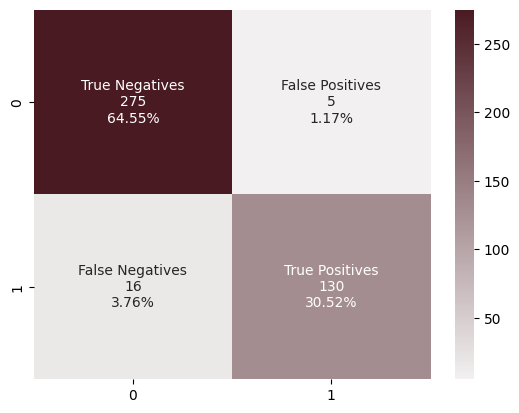

In [60]:
lg_cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 4, random_state = 2)
lg_scores = cross_val_score(lg, X_train, y_train, cv = lg_cv, scoring = 'roc_auc').mean()
print(f"Mean Cross-Validation Score: {lg_scores:.2f}")
#------------------------------------------------------------------------------

print(f"The ROC AUC Score is: {roc_auc_score(y_test, lg_pred):.2f}", '\n\n\n')
#------------------------------------------------------------------------------

lg_report = classification_report(y_test, lg_pred)
print('The classification report of Logistic Regressor is below : ', '\n\n\n', lg_report, '\n')
#------------------------------------------------------------------------------

fpr, tpr, _ = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
fig = make_subplots(rows=1, cols=1, subplot_titles=['ROC AUC Plot'])
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', line=dict(color='#4A1A22')))
fig.update_layout(xaxis_title='False Positive Rate', yaxis_title='True Positive Rate', plot_bgcolor='white')
fig.add_annotation(x=0.5, y=0.5, text='AUC = %0.2f' % roc_auc, showarrow=False, font=dict(color='#4A1A22'))
pio.show(fig)
#------------------------------------------------------------------------------

print('The confusion matrix is below : ')
cm = confusion_matrix(y_test, lg_pred)
names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
cmap = sns.light_palette("#4A1A22", as_cmap=True)
sns.heatmap(cm, annot = labels, cmap = cmap, fmt = '')

# **2. SVC Model Evaluation   ¶**

Mean Cross-Validation Score: 0.97
The ROC AUC Score is: 0.94 



The classification report of Logistic Regressor is below :  


               precision    recall  f1-score   support

           0       0.94      0.99      0.96       280
           1       0.98      0.88      0.92       146

    accuracy                           0.95       426
   macro avg       0.96      0.93      0.94       426
weighted avg       0.95      0.95      0.95       426
 



The confusion matrix is below :  



<Axes: >

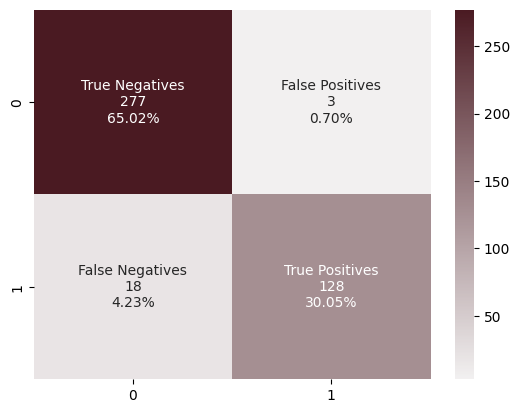

In [61]:
svc_cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 4, random_state = 2)
svc_scores = cross_val_score(svc, X_train, y_train, cv = svc_cv, scoring = 'roc_auc').mean()
print(f"Mean Cross-Validation Score: {lg_scores:.2f}")
#------------------------------------------------------------------------------

print(f"The ROC AUC Score is: {roc_auc_score(y_test, lg_pred):.2f}", '\n\n\n')
#------------------------------------------------------------------------------

svc_report = classification_report(y_test, svc_pred)
print('The classification report of Logistic Regressor is below : ', '\n\n\n', svc_report, '\n')
#------------------------------------------------------------------------------

fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
roc_auc = auc(fpr, tpr)
fig = make_subplots(rows=1, cols=1, subplot_titles=['ROC AUC Plot'])
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', line=dict(color='#4A1A22')))
fig.update_layout(xaxis_title='False Positive Rate', yaxis_title='True Positive Rate', plot_bgcolor='white')
fig.add_annotation(x=0.5, y=0.5, text='AUC = %0.2f' % roc_auc, showarrow=False, font=dict(color='#4A1A22'))
pio.show(fig)
#------------------------------------------------------------------------------

print('The confusion matrix is below : ', '\n')
cm = confusion_matrix(y_test, svc_pred)
names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
cmap = sns.light_palette("#4A1A22", as_cmap=True)
sns.heatmap(cm, annot = labels, cmap = cmap, fmt = '')

📊 Insights:
*  The performance evaluation revealed that the Logistic Regression performed well and gave an f1-score of 0.96. The precision-recall curve is indication a great performance with almost touching the top right corner having recall on x axis and precision on y axis










# **Credit Card Fraud Detection with TensorFlow**

Credit Card Fraud Detection with TensorFlow:


*   The credit card dataset contains transaction data used for fraud detection. It includes features like time, transaction amount, and anonymized features (V1-V28).

*   The dataset has imbalanced classes, with mostly legitimate transactions (Class 0) and fewer fraudulent ones (Class 1).
*   
My goal is to build a model that accurately classify transactions as fraudulent or legitimate, using techniques like regularization and evaluation metrics such as precision, recall, and F1-score.








# **📚Importin Libraries📚**

In [62]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras import regularizers
from scipy.stats import ks_2samp

# **⏳ Loading the dataset ⏳**

In [63]:
data = pd.read_csv("/content/creditcard.csv")
X = data.drop('Class', axis=1).values
y = data['Class'].values

# **Plot the class distribution**

In [64]:
pd.value_counts(data['Class'])

0    284315
1       492
Name: Class, dtype: int64

# **Distribution of credit card transactions over time   ¶**

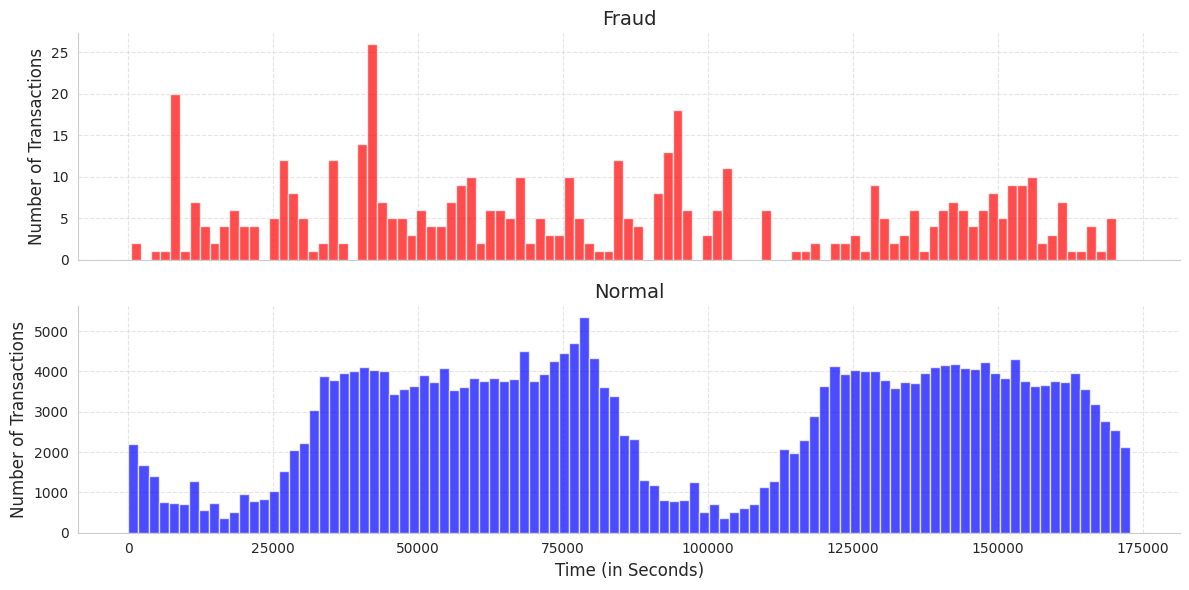

In [65]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

bins = 100

# Plotting for Fraud transactions
ax1.hist(data.Time[data.Class == 1], bins=bins, color='red', alpha=0.7)
ax1.set_title('Fraud', fontsize=14)
ax1.set_ylabel('Number of Transactions', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)

# Plotting for Normal transactions
ax2.hist(data.Time[data.Class == 0], bins=bins, color='blue', alpha=0.7)
ax2.set_title('Normal', fontsize=14)
ax2.set_xlabel('Time (in Seconds)', fontsize=12)
ax2.set_ylabel('Number of Transactions', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)

# Remove top and right spines
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

1. The red histogram represents fraudulent transactions. The x-axis shows the time in seconds, and the y-axis represents the number of transactions. Fraudulent transactions are relatively infrequent compared to normal transactions, as seen by the lower y-axis values. There are peaks at certain times, suggesting that fraudulent activity may occur in bursts or at specific moments rather than evenly distributed throughout the time frame covered.

2. The blue histogram represents normal transactions which have a higher volume. The pattern here is more consistent, with what appears to be a cyclical pattern suggesting higher transaction volumes at regular intervals. This could correspond to peak transaction times during the day, such as morning and evening hours when people are more likely to use their credit cards.

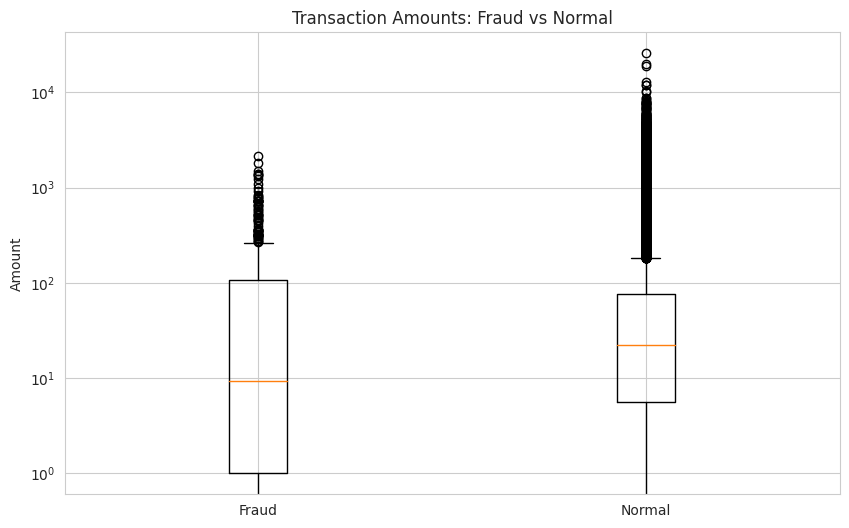

In [66]:
plt.figure(figsize=(10, 6))
plt.boxplot([data[data["Class"]==1]["Amount"], data[data["Class"]==0]["Amount"]],
            labels=['Fraud', 'Normal'])

plt.title('Transaction Amounts: Fraud vs Normal')
plt.ylabel('Amount')
plt.yscale('log')
plt.show()

The median fraudulent transaction is of 9.25 with the largest amount in a fraudulent transaction being 2125.87. The median amount for a normal transaction is 22 whereas the largest amount is 25691 which is substantially higher than the maximum for a fraudulent transaction. This could be due to the larger sample size or it could indicate that fraudsters avoid extremely large transactions that might trigger security mechanisms.

# **📊Data Preparation📊 ¶**



*   Split data into training, validation, and test sets (60/20/20).
*   Use stratified sampling to maintain the class distribution in each split.
*   Scale the training, validation, and test sets to a mean of zero mean and unit variance.






In [67]:
# split data into train, validation, and test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# **🎯Model Architecture🎯  ¶**

In [68]:
model = tf.keras.Sequential(
    [
        # Adjusted number of neurons
        tf.keras.layers.Dense(128, activation="relu", input_shape=(X.shape[-1],),
                              kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
        tf.keras.layers.Dropout(0.2),  # Adjusted dropout rate
        tf.keras.layers.Dense(64, activation="relu",
                              kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
        tf.keras.layers.Dropout(0.2),  # Adjusted dropout rate
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12289 (48.00 KB)
Trainable params: 12289 (48.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1. Input Layer: A dense layer with 128 neurons, ReLU activation function, and L2 regularization with a strength of 0.001. It takes input data with a shape determined by the number of features in the dataset.
2. Dropout Layer: A dropout layer with a dropout rate of 0.2, which helps prevent overfitting by randomly deactivating 20% of neurons during training.
3. Hidden Layer: Another dense layer with 64 neurons, ReLU activation, and L2 regularization with a strength of 0.001.
4. Another Dropout Layer: Similar to the previous dropout layer, with a rate of 0.2.
5. Output Layer: A dense layer with a single neuron and sigmoid activation function, used for binary classification.

# **⚡Metrics⚡**

In [69]:
metrics = [
    tf.keras.metrics.FalseNegatives(name="fn"),
    tf.keras.metrics.FalsePositives(name="fp"),
    tf.keras.metrics.TrueNegatives(name="tn"),
    tf.keras.metrics.TruePositives(name="tp"),
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.Recall(name="recall"),
]

In this imbalanced dataset using accuracy as the evaluation metric is not appropriate because it can be misleading. A model that predicts all instances as negative 0 would still achieve a high accuracy of 99%, even though it's not providing meaningful results. This is why I am prioritizing the following metrics:



# **⚡Model training⚡  ¶**








*   
Use the Adam optimizer with a learning rate of 0.0001.
*   Utilize binary cross-entropy as the loss function.
*   Set up an early stopping callback that monitors the validation loss for minimization.
*   Specify a patience of 5 epochs before stopping training if the validation loss does not improve.
*   Set class weights such that class 0 has a weight of 1, and class 1 has a weight of 5, giving more importance to the minority class.
*   Train for a maximum of 100 epochs.





In [71]:
# compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics = metrics)

# configure early stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# calculate class weights
neg, pos = np.bincount(y_train)
total = neg + pos
class_weight = {0: 1, 1: 5}

# train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[es], class_weight=class_weight)

Epoch 1/100
4006/4006 [==============================] - 18s 4ms/step - loss: 0.1612 - fn: 130.0000 - fp: 71.0000 - tn: 127871.0000 - tp: 91.0000 - precision: 0.5617 - recall: 0.4118 - val_loss: 0.0909 - val_fn: 15.0000 - val_fp: 13.0000 - val_tn: 42634.0000 - val_tp: 59.0000 - val_precision: 0.8194 - val_recall: 0.7973
Epoch 2/100
4006/4006 [==============================] - 14s 3ms/step - loss: 0.0820 - fn: 48.0000 - fp: 31.0000 - tn: 127911.0000 - tp: 173.0000 - precision: 0.8480 - recall: 0.7828 - val_loss: 0.0585 - val_fn: 11.0000 - val_fp: 16.0000 - val_tn: 42631.0000 - val_tp: 63.0000 - val_precision: 0.7975 - val_recall: 0.8514
Epoch 3/100
4006/4006 [==============================] - 14s 3ms/step - loss: 0.0550 - fn: 46.0000 - fp: 29.0000 - tn: 127913.0000 - tp: 175.0000 - precision: 0.8578 - recall: 0.7919 - val_loss: 0.0376 - val_fn: 11.0000 - val_fp: 14.0000 - val_tn: 42633.0000 - val_tp: 63.0000 - val_precision: 0.8182 - val_recall: 0.8514
Epoch 4/100
4006/4006 [===========

# **⚡Model Evaluation and Loss Visualization⚡  ¶**



*   Use the trained model to make predictions on the test dataset.
*   Calculate precision, recall, and F1 score as evaluation metrics for the model's performance on the test data.
*   Visualize the training and validation loss over the training epochs.



3561/3561 [==============================] - 6s 2ms/step
Precision: 0.7619047619047619
Recall: 0.8121827411167513
F1 Score: 0.7862407862407862


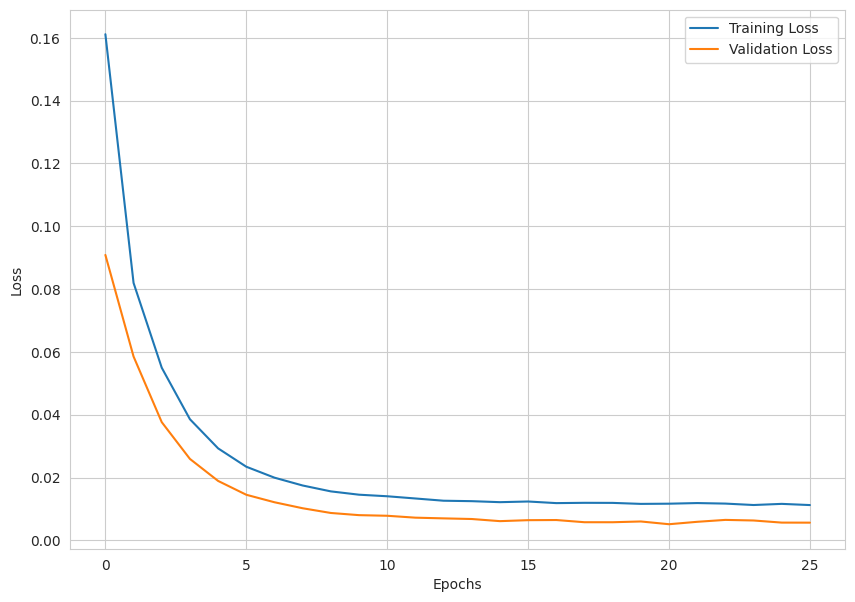

In [72]:
# predict test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# score precision, recall, and f1
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plot only the losses from history
losses = history.history['loss']
val_losses = history.history['val_loss']

plt.figure(figsize=(10, 7))
plt.plot(losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()





*   The training Loss decreases sharply at the beginning, which indicates that the model is quickly learning from the training data. As epochs increase, the rate of decrease slows down, suggesting that the model is starting to converge and is learning less from the training data with each epoch.
*   The validation Loss decreases along with the training loss, but it starts to plateau toward the end. The fact that the validation loss levels off but does not increase indicates that the model is not overfitting.
*   The early stopping after 30 epochs suggests that the model reached an optimal state in terms of generalization before performance on the validation set could deteriorate.


